In [123]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
DNA_SIZE = 1 
DNA_BOUND = [0, 5]
N_GENERATIONS = 200
MUT_STRENGTH = 5.0

In [125]:
def F(x): return np.cos(7*x)*(x**2) + np.sin(8*x)*(x**3) 

In [126]:
def get_fitness(pred): return pred.flatten()

In [127]:
def make_kid(parent):
    k = parent + MUT_STRENGTH * np.random.randn(DNA_SIZE)
    k = np.clip(k, *DNA_BOUND)
    return k

In [128]:
def kill_bad(parent, kid):
    global MUT_STRENGTH
    fp = get_fitness(F(parent))[0]
    fk = get_fitness(F(kid))[0]
    p_target = 1/5
    if fp < fk:     
        parent = kid
        ps = 1.     
    else:
        ps = 0.
    MUT_STRENGTH *= np.exp(1/np.sqrt(DNA_SIZE+1) * (ps - p_target)/(1 - p_target))
    return parent

In [129]:
parent = 5 * np.random.rand(DNA_SIZE)

In [130]:
plt.ion()

In [131]:
x = np.linspace(*DNA_BOUND, 200)

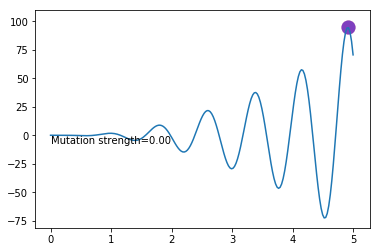

In [132]:
for _ in range(N_GENERATIONS):
    kid = make_kid(parent)
    py, ky = F(parent), F(kid)       
    parent = kill_bad(parent, kid)

    plt.cla()
    plt.scatter(parent, py, s=200, lw=0, c='red', alpha=0.5,)
    plt.scatter(kid, ky, s=200, lw=0, c='blue', alpha=0.5)
    plt.text(0, -7, 'Mutation strength=%.2f' % MUT_STRENGTH)
    plt.plot(x, F(x)); plt.pause(0.05)

plt.ioff(); plt.show()